## Assignment 2 

### Onset Detector 

Sometimes its useful to find where events in a musical file occurred, these are often called **onsets**. 

They are often characterised by a **peak in the signal** of the audio. 

The simplest approach would be to record every sample above a given threshold as a new onset.

However, these **onsets** and their peaks often occur over a length of time, and so the signal may be above a chosen threshold for a number of samples, but we want to identify these as **a single event**. 

As we step through the signal (sample by sample), there are a number of rules we can apply to determine if something is a **new onset** 

### The Algorithm


1. Is the sample value larger than any of the values surrounding it (+ / - a ``window_size``)?


2. Is the sample value larger than the average of all the values surrounding it (+ / - a ``window_size``)?


3. Have we had a onset recently (within a given ``wait_time``)?


### Task 1

Code an onset detector using the algorithm described above. We have provided a template of an approach you might like to take below. 

We want to save the onsets as we go (the sample location and the value) and then plot them on the **same plot as the original waveform**

The result should look like this (with the audio data in blue and onsets in orange).

There are libraries that will find onsets for you, but we would like you to this yourself implementing the algorithm described!

![alt text](onsets.png)

In [120]:
#Import and define function
import matplotlib.pyplot as plt
import numpy as np
import librosa
import librosa.display
import IPython.display as ipd

In [121]:
audio, sr = librosa.load('audio/drums0.wav')

/var/folders/yc/hhn6n9wj4597fzglj93p_df80000gn/T/ipykernel_35334/1671268218.py:37: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "yx" (-> color='y'). The keyword argument will take precedence.
  plt.plot(x1,y1,'yx',color='orange')


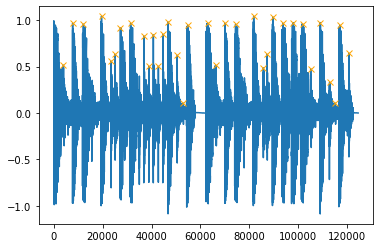

In [172]:
window_size = 2048
wait_time = 1024
#create the empty []
sample_max=[]
time_max=[]
time1=wait_time

#for every sample (careful to account for window size at the beginning and end)
for i in range(int(window_size//2),int(len(audio)-window_size//2)):
    # define the start and the end of window
    start=int(i-(window_size//2))
    end=int(i+(window_size//2))
    sample=audio[i]
    #the size of window
    window=audio[start:end]
    #the mean of the whole audio and use the abs() to make the result to be positive numbers
    mean1=abs(np.mean(audio))
    ## if biggest sample value in surrounding area AND---sample== the max of window
    ## if sample value bigger than mean of surrounding area AND---sample>abs(np.mean(audio))
    ## if we haven't had an onset recently THEN
    ## within a given wait_time
    if sample== np.max(window) and sample> mean1 and time1<=0:
        ## record time and sample value for plotting later
        sample_max.append(sample)
        time_max.append(i)
        time1=wait_time
    time1 -= 1

#print(sample_max)
#print(time_max)
##define the x-axis and y-axis 
x1=time_max
y1=sample_max
## plot audio file
plt.plot(audio)
## plot onset times and values on same plot
plt.plot(x1,y1,'yx',color='orange')

### Task 2 

Experiment with different settings for the your onset detector.

Provide a short discussion (max 250 words) on the advantages and disadvantages from having longer or shorter  ``window_size``s and ``wait_time``s.

In [ ]:
#decrease the window_size

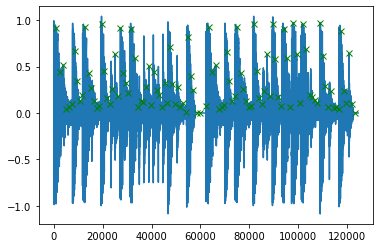

In [168]:
window_size = 100
wait_time = 1024
sample_max=[]
time_max=[]
time1=wait_time

#for every sample (careful to account for window size at the beginning and end)
for i in range(int(window_size//2),int(len(audio)-window_size//2)):
    start=int(i-(window_size//2))
    end=int(i+(window_size//2))
    sample=audio[i]
    #the size of window
    window=audio[start:end]
    #the mean of the all audio and use the abs() to make the result to be positive numbers
    mean1=abs(np.mean(audio))
    ## if biggest sample value in surrounding area AND---sample== the max of window
    ## if sample value bigger than mean of surrounding area AND---sample>abs(np.mean(audio))
    ## if we haven't had an onset recently THEN
    ## within a given wait_time
    if sample== np.max(window) and sample> mean1 and time1<=0:
        ## record time and sample value for plotting later
        sample_max.append(sample)
        time_max.append(i) 
        time1=wait_time
    time1 -= 1

#print(sample_max)
#print(time_max)
x1=time_max
y1=sample_max
## plot audio file
plt.plot(audio)
## plot onset times and values on same plot
plt.plot(x1,y1,'gx')

In [ ]:
##increase the wait_time

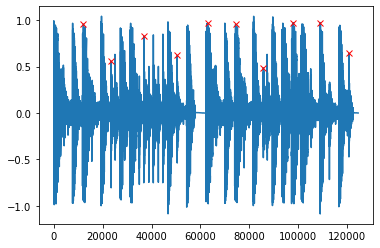

In [167]:
window_size = 2048
wait_time = 10000
sample_max=[]
time_max=[]
time1=wait_time

#for every sample (careful to account for window size at the beginning and end)
for i in range(int(window_size//2),int(len(audio)-window_size//2)):
    start=int(i-(window_size//2))
    end=int(i+(window_size//2))
    sample=audio[i]
    #the size of window
    window=audio[start:end]
    #the mean of the all audio and use the abs() to make the result to be positive numbers
    mean1=abs(np.mean(audio))
    ## if biggest sample value in surrounding area AND---sample== the max of window
    ## if sample value bigger than mean of surrounding area AND---sample>abs(np.mean(audio))
    ## if we haven't had an onset recently THEN
    ## within a given wait_time
    if sample== np.max(window) and sample> mean1 and time1<=0:
        ## record time and sample value for plotting later
        sample_max.append(sample)
        time_max.append(i)
        time1=wait_time
    time1 -= 1

#print(sample_max)
#print(time_max)
x1=time_max
y1=sample_max
## plot audio file
plt.plot(audio)
## plot onset times and values on same plot
plt.plot(x1,y1,'rx')

In [ ]:
#a short discussion on the advantages and disadvantages from having longer or shorter window_sizes and wait_times.
                                  
1	decrease window_size or wait_time
1.1	advantages
The window_size has been changed from 2048 to 100. 
As we can see from the first and second pictures, onsets have increased. 
More onsets can be found by decreasing the window_size. It can help us find onsets that are near other onsets. 
It is easier to study the audio by comparing or finding more onsets. 

1.2	Disadvantages
If we decrease the window_size a lot, too many onsets will be created. 
It will become difficult to be found in the picture. Some onsets will be found which are not big enough. 

2	Increase window_size or wait_time 
2.1	advantages
The wait_time has been changed from 1024 to 10000. As we can see from the first and third pictures, 
onsets have decreased. It can be seen clearly in the picture and help people be easier to find the peak values. 

2.2	disadvantages
Some of the onsets will not be accurate enough. 
Some peak values will not be added in the onsets because of the too-long wait_time. 
